In [ ]:
'''
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)
'''

'\nimport tensorflow as tf\nprint("Tensorflow version " + tf.__version__)\n\ntry:\n  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection\n  print(\'Running on TPU \', tpu.cluster_spec().as_dict()[\'worker\'])\nexcept ValueError:\n  raise BaseException(\'ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!\')\n\ntf.config.experimental_connect_to_cluster(tpu)\ntf.tpu.experimental.initialize_tpu_system(tpu)\ntpu_strategy = tf.distribute.TPUStrategy(tpu)\n'

In [ ]:
 pip install yfinance

In [ ]:
! pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=55eb73393bbb9616be4ef558565f92e52c1bcd26e1a239b1b940f8ce116659af
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
import pandas as PD
import numpy as np
%matplotlib inline
import datetime as dt
import matplotlib. pyplot as plt
import matplotlib
import pandas_datareader.data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential,Model
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas_ta as ta
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb


In [ ]:
import yfinance as yf
company = 'META'
df = yf.download('META', start = '2007-01-01', end='2023-11-03')
df.to_csv('META.csv')
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-10-05,304.630005,306.209991,299.500000,304.790009,304.790009,19130000
2023-10-06,301.440002,316.309998,300.910004,315.429993,315.429993,21784000
2023-10-09,312.500000,320.329987,311.820007,318.359985,318.359985,22503700


In [ ]:
# Adding indicators
df['RSI'] = ta.rsi(df['Close'], length=15)
df['EMAF'] = ta.ema(df['Close'], length=20)
df['EMAM'] = ta.ema(df['Close'], length=100)
df['EMAS'] = ta.ema(df['Close'], length=150)

# Set up target variables and features
df['Target'] = df['Adj Close'] - df['Open']
df['Target'] = df['Target'].shift(-1)
df['TargetClass'] = [1 if val > 0 else 0 for val in df['Target']]
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['Volume', 'Close'], axis=1, inplace=True)


In [ ]:
data_set = df.iloc[:, 0:11]#.values
PD.set_option('display.max_columns', None)
data_set.to_csv('All.csv')
data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Date,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass
0,2012-12-21,26.660000,27.010000,26.120001,26.260000,52.465087,26.533356,24.654216,24.615400,0.430000,1
1,2012-12-24,26.500000,26.959999,26.200001,26.930000,55.912439,26.571132,24.699281,24.646057,-0.520000,0
2,2012-12-26,27.030001,27.180000,26.379999,26.510000,53.315487,26.565310,24.735137,24.670745,-0.500000,0
3,2012-12-27,26.549999,26.799999,25.520000,26.049999,50.559777,26.516232,24.761174,24.689013,0.430000,1
4,2012-12-28,25.480000,26.110001,25.150000,25.910000,49.721752,26.458496,24.783923,24.705185,0.420000,1
5,2012-12-31,26.200001,26.990000,26.110001,26.620001,53.875846,26.473877,24.820281,24.730547,0.559999,1
6,2013-01-02,27.440001,28.180000,27.420000,28.000000,60.646926,26.619222,24.883246,24.773851,-0.109999,0
7,2013-01-03,27.879999,28.469999,27.590000,27.770000,59.097711,26.728820,24.940409,24.813535,0.750000,1
8,2013-01-04,28.010000,28.930000,27.830000,28.760000,63.408479,26.922266,25.016044,24.865806,0.730000,1
9,2013-01-07,28.690001,29.790001,28.650000,29.420000,65.970235,27.160145,25.103252,24.926127,-0.450001,0


In [ ]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (2718, 11)
Null Value Present:  False


<Axes: >

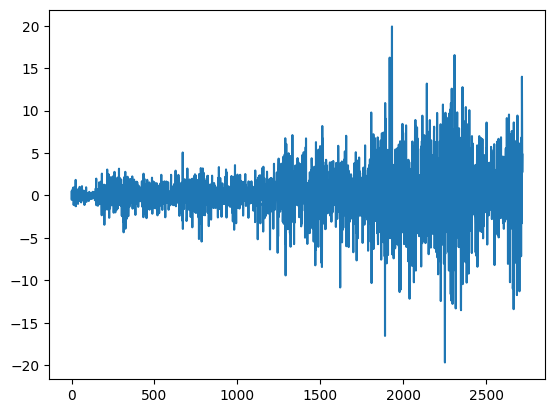

In [ ]:
#Plot the True Adj Close Value
df['Target'].plot()

In [ ]:
#Set Target Variable
output_var = PD.DataFrame(df['Target'])
#Selecting the Features
features = ['Open', 'High', 'Low','TargetClass','Adj Close']
#'Open', 'High', 'Low'

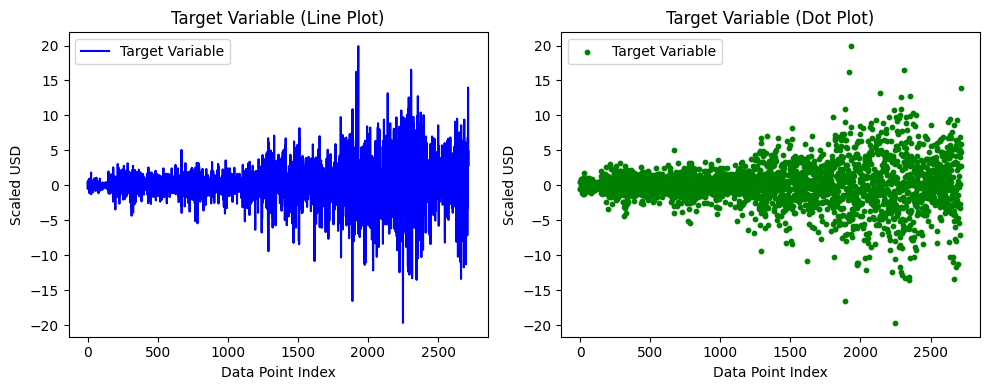

In [ ]:
import matplotlib.pyplot as plt

# Create an index for the data points
index = range(len(output_var))

# Plot the target variable as a normal line graph in blue
plt.figure(figsize=(10, 4))  # Set figure size
plt.subplot(1, 2, 1)  # Create a subplot
plt.plot(index, output_var.values, label='Target Variable', color='blue')
plt.title("Target Variable (Line Plot)")
plt.xlabel('Data Point Index')
plt.ylabel('Scaled USD')
plt.legend()

# Plot the target variable as a dot graph in green
plt.subplot(1, 2, 2)  # Create another subplot
plt.scatter(index, output_var.values, label='Target Variable', color='green', s=10, marker='o')
plt.title("Target Variable (Dot Plot)")
plt.xlabel('Data Point Index')
plt.ylabel('Scaled USD')
plt.legend()

plt.tight_layout()  # Ensure proper layout
plt.show()


In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= PD.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,TargetClass,Adj Close
0,0.010232,0.010852,0.009687,1.0,0.009352
1,0.009786,0.010713,0.009912,0.0,0.011217
2,0.011263,0.011322,0.010417,0.0,0.010048
3,0.009925,0.010270,0.008002,1.0,0.008768
4,0.006942,0.008360,0.006964,1.0,0.008378


In [ ]:
n_splits = 10
timesplit = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store the train and test sets
train_X_list = []
train_y_list = []
test_X_list = []
test_y_list = []

# Generate the train-test splits based on TimeSeriesSplit
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform.iloc[train_index], feature_transform.iloc[test_index]
    y_train, y_test = output_var.iloc[train_index], output_var.iloc[test_index]

    train_X_list.append(X_train)
    train_y_list.append(y_train)
    test_X_list.append(X_test)
    test_y_list.append(y_test)

In [ ]:

train_X = PD.concat(train_X_list)
train_y = PD.concat(train_y_list)
test_X = PD.concat(test_X_list)
test_y = PD.concat(test_y_list)


# Process the data for LSTM
train_X = train_X.values.reshape(train_X.shape[0], 1, train_X.shape[1])
test_X = test_X.values.reshape(test_X.shape[0], 1, test_X.shape[1])


In [ ]:
print(train_X.shape)
print(train_y.shape)

(13595, 1, 5)
(13595, 1)


In [ ]:
model_autoencoder = Sequential()
model_autoencoder.add(LSTM(64, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model_autoencoder.add(LSTM(32, activation='relu', return_sequences=False))
model_autoencoder.add(RepeatVector(train_X.shape[1]))
model_autoencoder.add(LSTM(32, activation='relu', return_sequences=True))
model_autoencoder.add(LSTM(64, activation='relu', return_sequences=True))
model_autoencoder.add(TimeDistributed(Dense(train_X.shape[2])))
model_autoencoder.compile(optimizer='adam', loss='mae')

history = model_autoencoder.fit(train_X, train_X, epochs=100, batch_size=32, validation_data=(test_X, test_X), verbose=2)

# Extract encoded representations from the middle layer of the Autoencoder
encoder_layer = Model(inputs=model_autoencoder.input, outputs=model_autoencoder.layers[2].output)
train_X1 = encoder_layer.predict(train_X)
test_X1 = encoder_layer.predict(test_X)




Epoch 1/100
425/425 - 13s - loss: 0.1474 - val_loss: 0.1045 - 13s/epoch - 31ms/step
Epoch 2/100
425/425 - 6s - loss: 0.0852 - val_loss: 0.0130 - 6s/epoch - 14ms/step
Epoch 3/100
425/425 - 5s - loss: 0.0049 - val_loss: 0.0060 - 5s/epoch - 12ms/step
Epoch 4/100
425/425 - 8s - loss: 0.0028 - val_loss: 0.0038 - 8s/epoch - 18ms/step
Epoch 5/100
425/425 - 5s - loss: 0.0028 - val_loss: 0.0039 - 5s/epoch - 13ms/step
Epoch 6/100
425/425 - 6s - loss: 0.0028 - val_loss: 0.0029 - 6s/epoch - 14ms/step
Epoch 7/100
425/425 - 4s - loss: 0.0027 - val_loss: 0.0030 - 4s/epoch - 9ms/step
Epoch 8/100
425/425 - 4s - loss: 0.0026 - val_loss: 0.0029 - 4s/epoch - 9ms/step
Epoch 9/100
425/425 - 2s - loss: 0.0026 - val_loss: 0.0045 - 2s/epoch - 6ms/step
Epoch 10/100
425/425 - 3s - loss: 0.0025 - val_loss: 0.0033 - 3s/epoch - 6ms/step
Epoch 11/100
425/425 - 3s - loss: 0.0027 - val_loss: 0.0031 - 3s/epoch - 6ms/step
Epoch 12/100
425/425 - 3s - loss: 0.0025 - val_loss: 0.0039 - 3s/epoch - 7ms/step
Epoch 13/100
425/

In [ ]:

# Create and train an XGBoost regressor using the encoded representations
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=3,
    learning_rate=0.2,
    n_estimators=100,
    eval_metric='mae'
)



model_xgb.fit(train_X1.reshape(train_X1.shape[0], -1), train_y)

y_pred1 = model_xgb.predict(test_X1.reshape(test_X1.shape[0], -1))

# Ensure test_y is a 1D array
test_y = test_y.values.reshape(-1)

# Evaluate the XGBoost model using a regression metric (e.g., Mean Absolute Error)
mae = np.mean(np.abs(y_pred1 - test_y))
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.2825592809119206


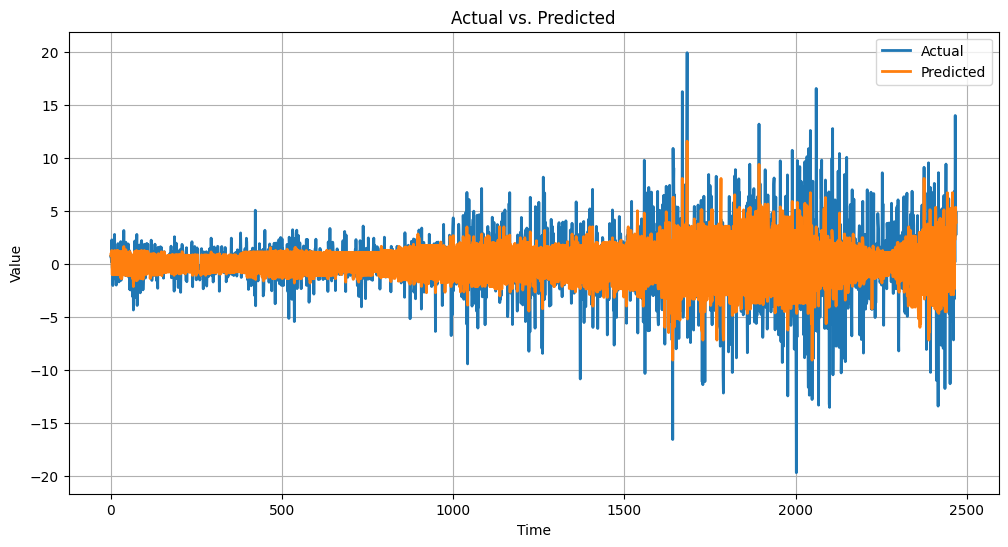

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot( test_y, label='Actual', linewidth=2)
plt.plot( y_pred1, label='Predicted', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

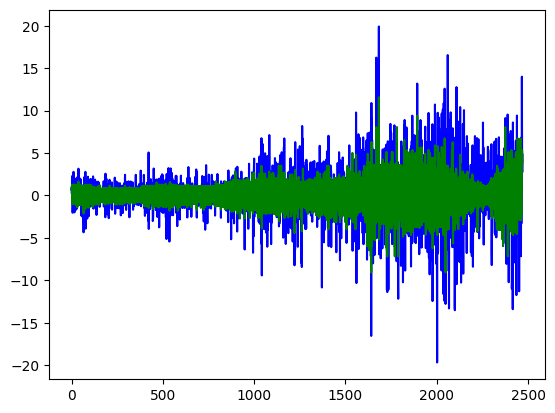

In [ ]:
plt.plot(test_y, label='True Values', color='blue')
plt.plot(y_pred1, label='Predicted Values', color='green')

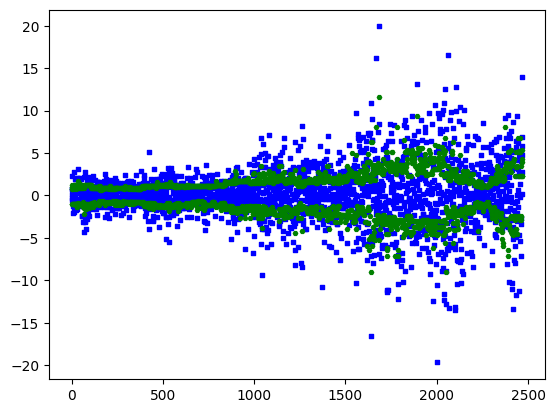

In [ ]:
index = range(len(test_y))

plt.scatter(index, test_y, label='True Values', color='blue', s=10, marker='s')

plt.scatter(index, y_pred1, label='Ensemble Predictions', color='green', s=10, marker='H')

In [ ]:
n_splits = 10
timesplit = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store the train and test sets
train_X_list = []
train_y_list = []
test_X_list = []
test_y_list = []

# Generate the train-test splits based on TimeSeriesSplit
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform.iloc[train_index], feature_transform.iloc[test_index]
    y_train, y_test = output_var.iloc[train_index], output_var.iloc[test_index]

    train_X_list.append(X_train)
    train_y_list.append(y_train)
    test_X_list.append(X_test)
    test_y_list.append(y_test)

In [ ]:

train_X = PD.concat(train_X_list)
train_y = PD.concat(train_y_list)
test_X = PD.concat(test_X_list)
test_y = PD.concat(test_y_list)


# Process the data for LSTM
train_X = train_X.values.reshape(train_X.shape[0], 1, train_X.shape[1])
test_X = test_X.values.reshape(test_X.shape[0], 1, test_X.shape[1])


In [ ]:
#train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2])
#test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2])

# Create the LSTM model
# Build the LSTM model with dropout layers
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, train_X.shape[2]), activation='tanh', return_sequences=False))
lstm.add(Dense(16))
lstm.add(Dense(8))
lstm.add(Dense(4))
lstm.add(Dense(2))
lstm.add(Dense(1))

# Compile the model
lstm.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))



In [ ]:
# Train the model
#history = lstm.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=2)



In [ ]:

early_stopping = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, monitor='val_loss')

# Train the model with callbacks
history = lstm.fit(
    train_X, train_y,
    epochs=111,
    batch_size=32,
    verbose=2,
    shuffle=False,
    validation_data=(test_X, test_y),
    #callbacks=[early_stopping, reduce_lr]
)


Epoch 1/111
425/425 - 5s - loss: 2.3052 - val_loss: 10.6598 - 5s/epoch - 12ms/step
Epoch 2/111
425/425 - 2s - loss: 2.0955 - val_loss: 10.0275 - 2s/epoch - 6ms/step
Epoch 3/111
425/425 - 2s - loss: 2.0772 - val_loss: 9.1032 - 2s/epoch - 6ms/step
Epoch 4/111
425/425 - 2s - loss: 2.0841 - val_loss: 8.6395 - 2s/epoch - 5ms/step
Epoch 5/111
425/425 - 1s - loss: 2.0958 - val_loss: 8.7302 - 1s/epoch - 3ms/step
Epoch 6/111
425/425 - 1s - loss: 2.0960 - val_loss: 8.4538 - 1s/epoch - 3ms/step
Epoch 7/111
425/425 - 1s - loss: 2.1038 - val_loss: 8.5434 - 1s/epoch - 3ms/step
Epoch 8/111
425/425 - 2s - loss: 2.1042 - val_loss: 8.5639 - 2s/epoch - 4ms/step
Epoch 9/111
425/425 - 2s - loss: 2.1148 - val_loss: 8.7836 - 2s/epoch - 4ms/step
Epoch 10/111
425/425 - 1s - loss: 2.1050 - val_loss: 7.7208 - 1s/epoch - 3ms/step
Epoch 11/111
425/425 - 2s - loss: 2.1216 - val_loss: 9.0263 - 2s/epoch - 4ms/step
Epoch 12/111
425/425 - 2s - loss: 2.1199 - val_loss: 8.7425 - 2s/epoch - 5ms/step
Epoch 13/111
425/425 -

In [ ]:
test_loss = lstm.evaluate(test_X, test_y)
print(f'Test Loss: {test_loss}')

78/78 [==============================] - 0s 2ms/step - loss: 6.2343
Test Loss: 6.23427677154541


In [ ]:
y_pred = lstm.predict(test_X)
mse = mean_squared_error(test_y, y_pred)
rmse = (mse)**0.5
print("Root Mean Squared Error:", rmse)

78/78 [==============================] - 1s 2ms/step
Root Mean Squared Error: 2.496853287047798


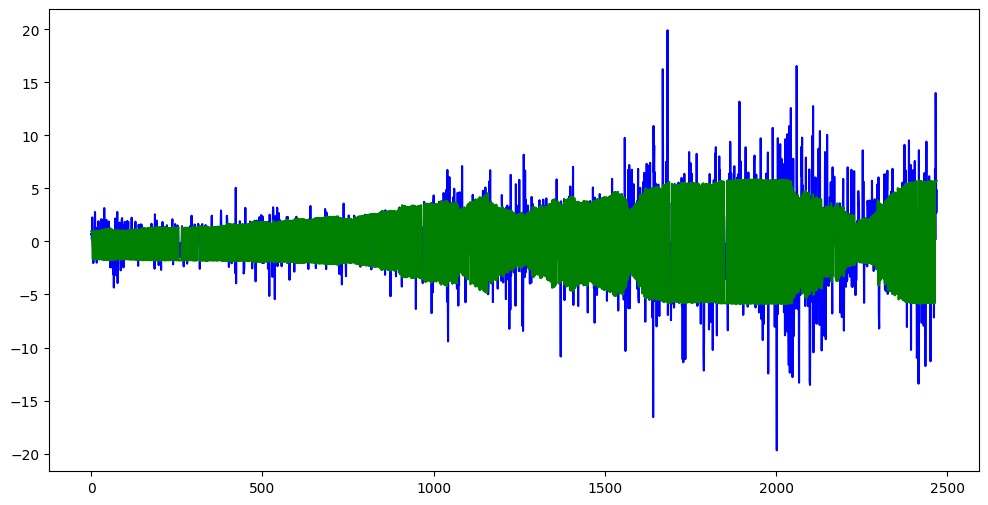

In [ ]:
index = range(len(test_y))
plt.figure(figsize=(12, 6))
plt.plot(index,test_y, label='True Values', color='blue')
plt.plot(index,y_pred, label='Ensemble Predictions', color='green')

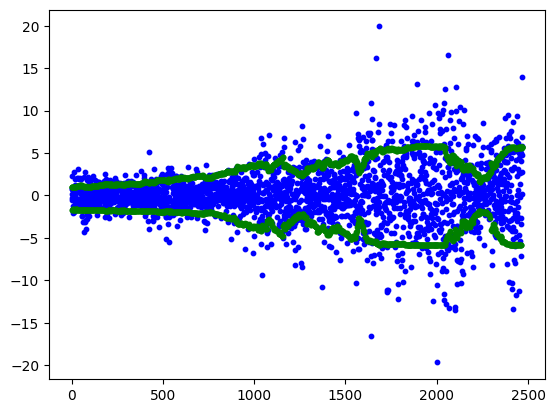

In [ ]:
index = range(len(test_y))
plt.figure(figsize=(12, 6))
plt.scatter(index, test_y, label='True Values', color='blue', s=10, marker='o')

plt.scatter(index, y_pred, label='Ensemble Predictions', color='green', s=10, marker='o')

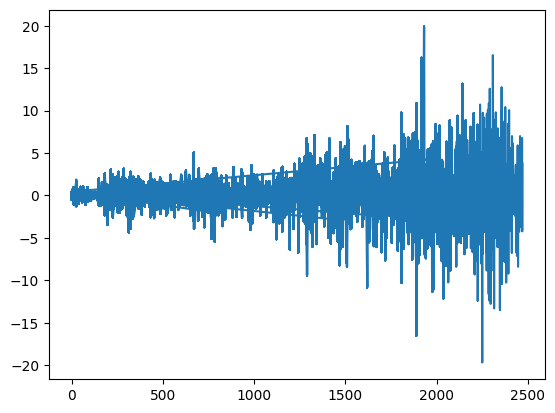

In [ ]:
plt.plot(train_y['Target'])

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


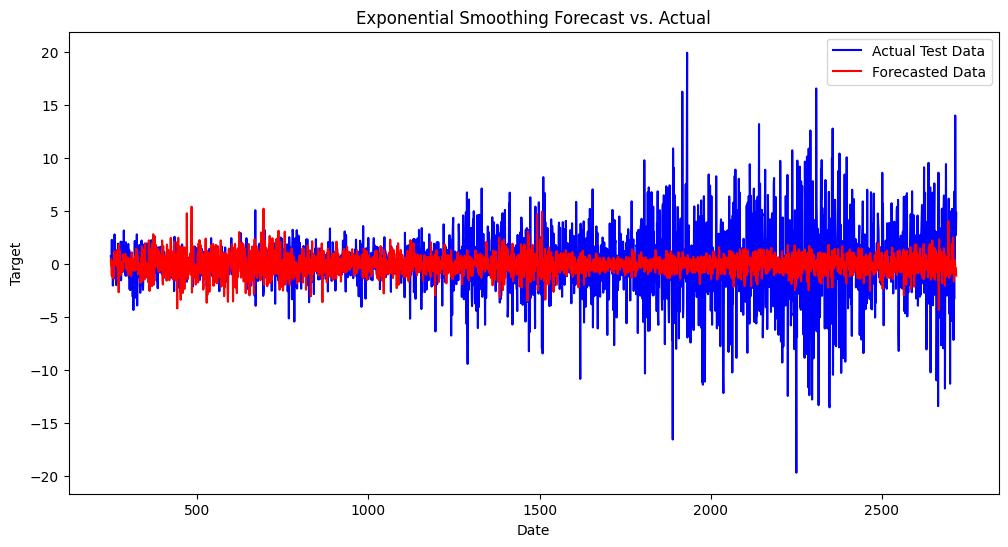

In [ ]:
# Tuning Parameters
seasonal_periods = 3000  # Adjust the seasonal period as needed
trend = 'add'  # Adjust the trend ('add' or 'additive', 'mul' or 'multiplicative')
seasonal = 'add'  # Adjust the seasonal ('add' or 'additive', 'mul' or 'multiplicative')

# Train an Exponential Smoothing model on the 'Target' variable
model = sm.tsa.ExponentialSmoothing(train_y['Target'], seasonal=seasonal, seasonal_periods=seasonal_periods, trend=trend)
fitted_model = model.fit()

# Forecast using the trained model
forecast = fitted_model.forecast(steps=len(test_y))

# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y['Target'], label='Actual Test Data', color='blue')
plt.plot(test_y.index, forecast, label='Forecasted Data', color='red')
plt.title('Exponential Smoothing Forecast vs. Actual')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.show()


In [ ]:
ensemble_predictions = (y_pred1 + forecast + y_pred.flatten()) / 3

ensemble_mse = mean_squared_error(test_y, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)
print("Root Mean Squared Error (Ensemble):", ensemble_rmse)



Root Mean Squared Error (Ensemble): 2.1081274943444868


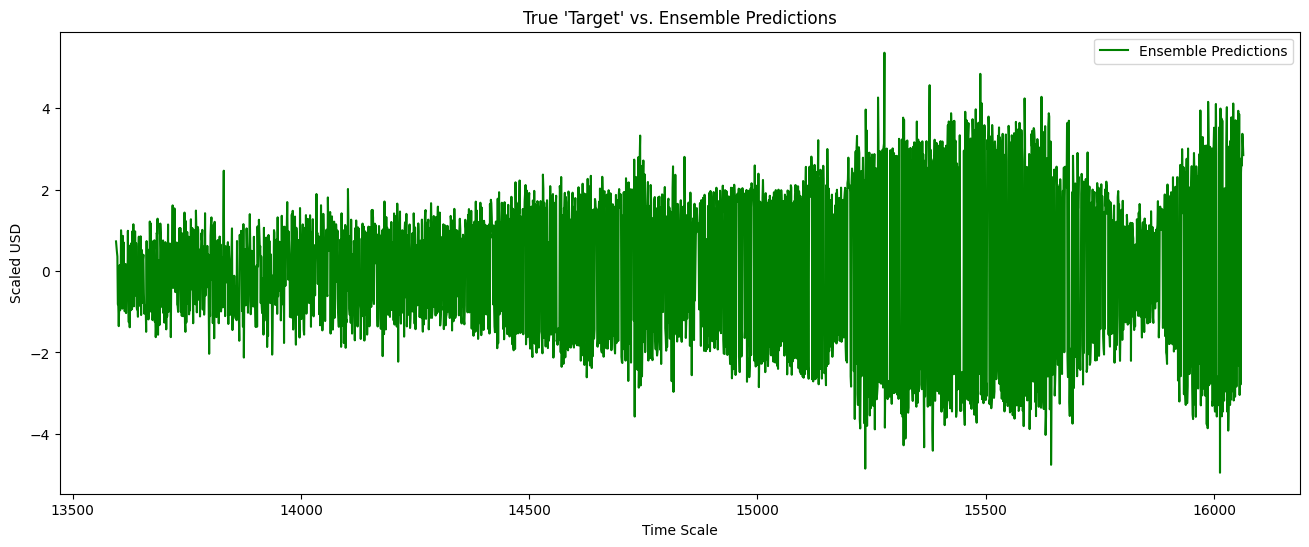

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(ensemble_predictions, label='Ensemble Predictions', color='green')

plt.title("True 'Target' vs. Ensemble Predictions")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

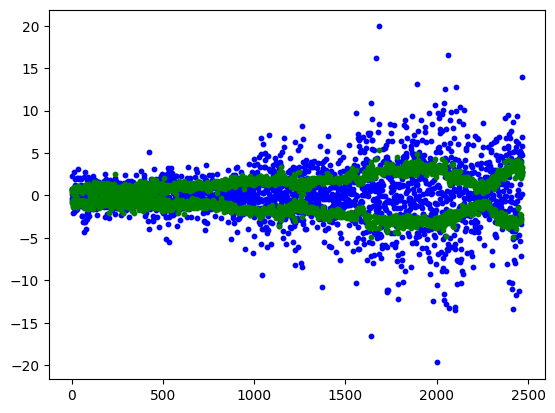

In [ ]:
index = range(len(test_y))
plt.figure(figsize=(12, 6))
plt.scatter(index, test_y, label='True Values', color='blue', s=10, marker='o')
plt.scatter(index, ensemble_predictions, label='Ensemble Predictions', color='green', s=10, marker='o')


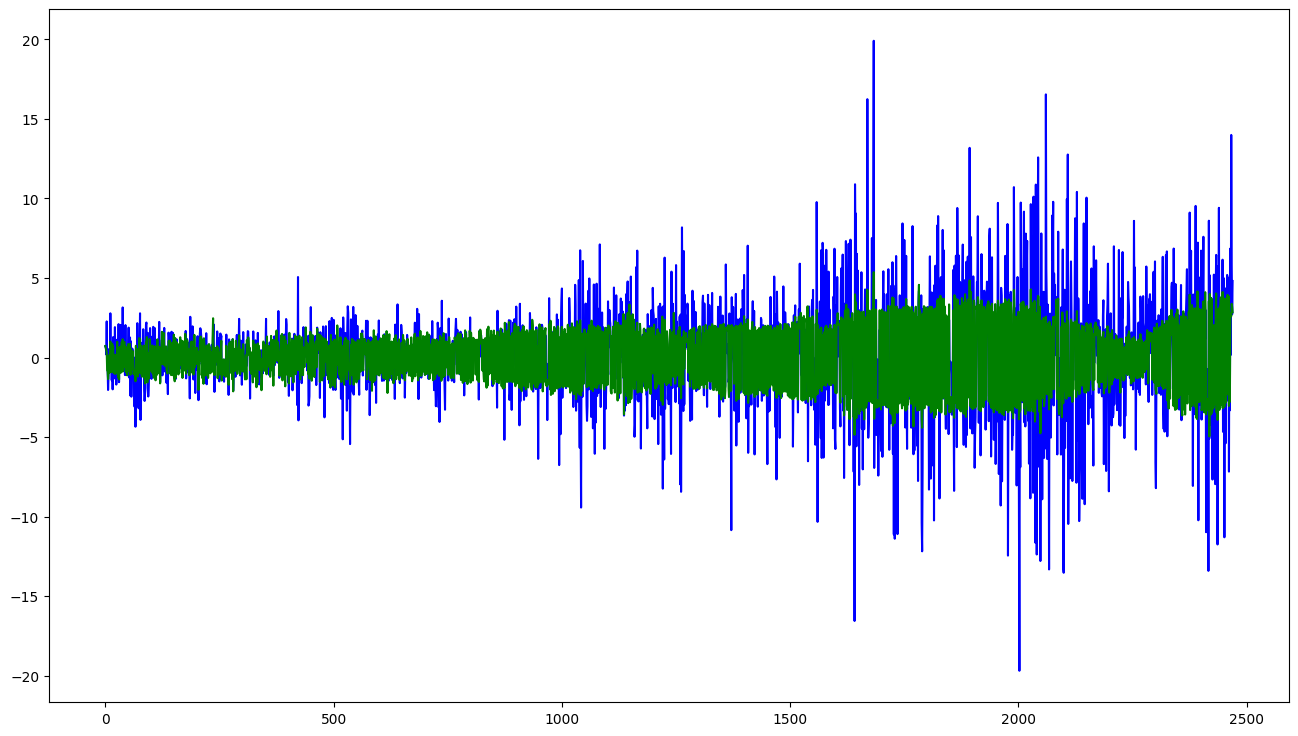

In [ ]:
index = range(len(test_y))
plt.figure(figsize=(16, 9))
plt.plot(index, test_y, label='True Values', color='blue')
plt.plot(index,ensemble_predictions, label='Ensemble Predictions', color='green')


In [ ]:
'''
# Plot the real data
plt.plot(test_y, label='Real Data', color='blue')

# Plot the predicted data
plt.plot(ensemble_predictions, label='Predicted Data', color='green')

plt.title("Real Data vs. Predicted Data")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()
'''

'\n# Plot the real data\nplt.plot(test_y, label=\'Real Data\', color=\'blue\')\n\n# Plot the predicted data\nplt.plot(ensemble_predictions, label=\'Predicted Data\', color=\'green\')\n\nplt.title("Real Data vs. Predicted Data")\nplt.xlabel(\'Time Scale\')\nplt.ylabel(\'Scaled USD\')\nplt.legend()\nplt.show()\n'